#### Project:  Data Wrangling for WeRateDogs Twitter Data
#### By:          Quang Luong
#### Due Date: 12/11/2018

## Introduction

This project is to perform data wrangling activity on Twitter data.  The dataset that is used is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.  Additional data is to be obtained using the Twitter API which will be in a JSON format.  The final source is the image predictions. 

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
pd.set_option('display.max_colwidth', -1)

## Gather Data

In [3]:
# read in the WeRateDogs twitter archive - twitter_archive_enhanced.csv
df_arch = pd.read_csv ('twitter-archive-enhanced.csv')


In [4]:
# getting the image predictions
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

#open the tsv
with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
    

# put into a panda dataframe
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

#os.listdir()

In [5]:
#df_image_predictions

In [6]:
# # from twitter-api.py supplied by Udacity (this is used for when you don't/can't create a Twitter account to access the data)
# # getting twitter from api

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_arch.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet-json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
#             #fails_dict[tweet_id]
#             #break
# end = timer()
# print(end - start)
# print(fails_dict)

In [7]:
# Reading the tweet-json.txt file 

df_tweet = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for itm in file:
        tweet = json.loads(itm)
        #print(tweet)
        #break
        df_tweet.append(tweet)
        
#convert to panda dataframe
df_tweets = pd.DataFrame(df_tweet, columns = list(df_tweet[0].keys()))


In [8]:
df_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [9]:
# get only the needed columns
df_tweets_2 = df_tweets[['id','retweet_count', 'favorite_count']]
df_tweets_2.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

#### Twitter Archive Columns (df_arch):
- `tweet_id`: Id of tweet
- `timestamp`: Date and time of the post
- `source`: How the submission was posted (Twitter for iPhone, Twitter Web Client, Make a Scene, Tweetdeck)
- `text`: The text the twitter user posted
- `expanded_urls`: Web address of post
- `rating_numerator`: Number of stars dog received
- `rating_denominator`: Number of stars dog could have received
- `name`: name of the dog
- `doggo`: a dog of medium to large size
- `floofer`: a very fluffy dog
- `pupper`: a dog of smaller size
- `puppo`: a puppy

In [10]:
# sample view of the twitter archive data
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [11]:
# view the last 5 rows of twitter archives data
df_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [12]:
# Look at datatypes of the twitter archive
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#df_arch[df_arch.retweeted_status_id == np.isnan]

# check that there are any retweets
df_arch[df_arch['retweeted_status_id'].apply(np.isnan) == False]
 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [14]:
df_arch.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [15]:
# checking the numerator values
df_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [16]:
# checking the denominator values
df_arch.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

<BR><BR>
#### Image Predictions Columns (df_image_predictions):
- `tweet_id:` tweet Id
- `jpg_url:` Web address of dog image
- `img_num:` a column containing the number 1
- `p1` is the algorithm's #1 prediction for the image in the tweet → golden retriever
- `p1_conf` is how confident the algorithm is in its #1 prediction → 95%
- `p1_dog` is whether or not the #1 prediction is a breed of dog → TRUE
- `p2` is the algorithm's second most likely prediction → Labrador retriever
- `p2_conf` is how confident the algorithm is in its #2 prediction → 1%
- `p2_dog` is whether or not the #2 prediction is a breed of dog → TRUE

In [17]:
# observing image predictions data
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# observing last 5 rows of image predictions data
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
# view datatype of image prediction data
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# see what type of values we are getting
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Staffordshire_bullterrier    20 
German_shepherd              20 
Siberian_husky               20 
web_site                     19 
Cardigan                     19 
Shetland_sheepdog            18 
Eskimo_dog                   18 
beagle                       18 
Maltese_dog                  18 
teddy                        18 
Rottweiler                   17 
Lakeland_terrier             17 
Shih-Tzu                     17 
Italian_greyhound            16 
kuvasz                       16 
          

* it seems we are getting non-dogs as well. 

<BR><BR>
#### JSON Tweets (df_tweets_2):
- `id` Tweet id
- `retweet_count` number of times retweeted
- `favorite_count` number of times a tweet was marked as a favorite

In [21]:
 # looking at tweets data
df_tweets_2.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [22]:
# view datatype of tweets data
df_tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Summary:

### Quality:
#### Twitter Archive (df_arch) table:
1.     dog stages contains 'None' <BR>
2.     ratings in the text column does not reflect accurately to the ratings columns <BR>
3.     dog names are incorrect and missing <BR>
4.     rating numerator and denominator should be float instead of int 
       dog stages should be a category instead of string

5. contains retweets (retweeted_status_id is not null)

6.  Removing unnecessary columns:
     - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp <BR>

7.  Tweet_id should be string.

#### Image predictions (df_image_predictions) table:
8.  p1_dog, p2_dog, p3_dog include image predictions where it is not a dog.
9.  Tweet_id should be string.

#### json (df_tweets) table:
10. id should be string.
 
 
### Tidiness:
#### Twitter Archive (df_arch) table:
1. columns doggo, floofer, pupper, puppo can be one column
2. combine df_image_predictions and df_tweets_2 into df_arch

## Cleaning Data

In [23]:
# make copies of dataframes
df_arch_clean   = df_arch.copy()
df_image_clean  = df_image_predictions.copy()
df_tweets_clean = df_tweets_2.copy()

### Missing Data:

#### Quality #1:  `Archive` table: Dog phases contain 'None'
#### Define:
  Change the following columns: doggo, floofer, pupper, puppo that has 'None' to 'NaN'

#### Code:

In [24]:
#df_arch_clean[df_arch_clean.doggo == 'None'] 
df_arch_clean.doggo.replace('None', np.nan, inplace=True)
df_arch_clean.floofer.replace('None', np.nan, inplace=True)
df_arch_clean.pupper.replace('None', np.nan, inplace=True)
df_arch_clean.puppo.replace('None', np.nan, inplace=True)

#### Test:

In [25]:
sum(df_arch_clean.doggo == 'None')
#sum(df_arch_clean.floofer == 'None')

0

#### Quality #2:  `Archive` table:   ratings in the TEXT variable do not reflect accurately to the RATINGS columns
#### Define:
Search in the Text column for "/10" and use it as the numerator and denominator

#### Code:

In [26]:
# find the string of interest.. 
df_arch_clean_ratings = df_arch_clean.text.str.contains('[-+]?\d*\.?\d+/10')
#df_arch_clean_ratings

# keep the ones that have the searched pattern
df_ratings = df_arch_clean[df_arch_clean_ratings]

# get the ratings from the text column fitting that pattern
df_ratings_split = df_ratings.text.str.extract('([-+]?\d*\.?\d+/10)', expand=False)
#df_ratings_split

# split into numerator and denominator by applying a function to the entire series
df_arch_clean['rating_numerator'] = df_ratings_split.apply(lambda x: int(float(str(x)[:-3])))
df_arch_clean['rating_denominator'] = 10


#### Test:

In [27]:
df_arch_clean[['tweet_id','text', 'rating_numerator', 'rating_denominator']].sample(5)

#df_arch_clean[df_arch_clean['tweet_id'] == 778027034220126208]

,tweet_id,text,rating_numerator,rating_denominator
1513,691096613310316544,Here we see one dog giving a puptalk to another dog. Both are focused af. Left one has powerful feet. 11/10 for both https://t.co/fUacc13OrW,11.0,10
804,772117678702071809,Meet Jack. He's a Clemson pup. Appears to be rather h*ckin pettable. Almost makes me want to root for Clemson. 12/10 https://t.co/GHOfbTVQti,12.0,10
1159,724046343203856385,"This is Sarge. Not even he knows what his tongue is doing, but it's pretty damn spectacular. 10/10 https://t.co/pIQEdbBxdL",10.0,10
2282,667211855547486208,This is Genevieve. She is a golden retriever cocktail mix. Comfortable close to wall. Shows no emotions. 9/10 https://t.co/azEoGqVonH,9.0,10
474,816091915477250048,This is Comet. He's a Wild Estonian Poofer. Surprised they caught him. 12/10 would pet well https://t.co/tlfuZ25IMi,12.0,10


#### Quality #3:  `Archive` table:   dog names are incorrect and missing
Names are assigned incorrectly when the text string is something like "This is very..." , "This is quite.." , "This is such.." etc. There is an option to pull names by looking for the text string "name is..." or "Named..." and take the subsequent word as name.  However, there is still missing names for the cases of "This is ....".  

Because of this and I do not believe Names are of value here, I'm going to just set the "None" to NaN

#### Define:
Set the Name column from "None" to NaN

#### Code:

In [28]:
# replacing 'None' with NaN
df_arch_clean.name.replace('None', np.nan, inplace=True)

#### Test:

In [29]:
sum(df_arch_clean.name == 'None')

0

#### Quality #7, #9, #10 Tweet_id and Id should be string
#### Define: 
Convert tweet id on each of the three data sets to object

#### Code:

In [30]:
#converting these id's here so that I can combine the datasets in the tidiness step next
df_arch_clean['tweet_id'] = df_arch_clean['tweet_id'].astype(str)
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)
df_tweets_clean['id'] = df_tweets_clean['id'].astype(str)

#### Tests:

In [31]:
# test 1
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2340 non-null float64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(5), int64(1), object

In [32]:
# test 2
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [33]:
# test 3
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB



### Tidiness:
####  Tidiness #1: `Archive` table:  columns doggo, floofer, pupper, puppo can be one column

#### Define:
Melt the four columns into one called dog_phases

In [34]:
# https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas?noredirect=1&lq=1
# combine into one column
df_arch_clean['dog_phase'] = df_arch_clean[df_arch_clean.columns[13:17]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
#df_arch_clean['dog_phase'] = df_arch_clean.iloc[14:17].apply(lambda x: ''.join(x.astype(str)), axis=1)

#set dog_phase to NaN where blank
#https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe

df_arch_clean.loc[df_arch_clean['dog_phase'] == '', 'dog_phase'] = np.nan

#drop columns
columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_arch_clean = df_arch_clean.drop(columns, axis=1)


#### Test:

In [35]:
#test 1
df_arch_clean.sample(5)

# this row contains multiple dog stages:
#df_arch_clean.iloc[575]  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_phase
422,821813639212650496,NaN,NaN,2017-01-18 20:16:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Hercules. He can have whatever he wants for the rest of eternity. 12/10 would snug passionately https://t.co/mH0IOyFdIG,7.806013e+17,4.196984e+09,2016-09-27 02:53:48 +0000,"https://twitter.com/dog_rates/status/780601303617732608/photo/1,https://twitter.com/dog_rates/status/780601303617732608/photo/1",12.0,10,Hercules,NaN
1672,682389078323662849,NaN,NaN,2015-12-31 02:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Brody. He's a Downton Abbey Falsetto. Addicted to grating cheese. He says he can stop but we know he can't\n9/10 https://t.co/vBeiQq6SaZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682389078323662849/photo/1,9.0,10,Brody,NaN
1960,673363615379013632,NaN,NaN,2015-12-06 04:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This little pupper can't wait for Christmas. He's pretending to be a present. S'cute. 11/10 twenty more days 🎁🎄🐶 https://t.co/m8r9rbcgX4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673363615379013632/photo/1,11.0,10,NaN,pupper
1902,674644256330530816,NaN,NaN,2015-12-09 17:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674644256330530816/photo/1,11.0,10,NaN,NaN
691,787322443945877504,NaN,NaN,2016-10-15 16:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lincoln. He forgot to use his blinker when he changed lanes just now. Guilty as h*ck. Still 10/10 https://t.co/lsrR83SiVp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787322443945877504/photo/1,10.0,10,Lincoln,NaN


In [36]:
# test 2 - to see that we've removed the 4 individual columns for dog stages
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2340 non-null float64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_phase                     380 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 257.8+ KB


In [37]:
# test 3
df_arch_clean.dog_phase.value_counts()

pupper           245
doggo            83 
puppo            29 
doggo,pupper     12 
floofer          9  
doggo,puppo      1  
doggo,floofer    1  
Name: dog_phase, dtype: int64

####  Tidiness #2: `Archive` table:   combine df_image_predictions and df_tweets_2 into df_arch

#### Define:
Joining the Archive with the image_predictions first.  By using an inner join we will eliminate the records that do not have any images.

#### Code:

In [38]:
# joining archive with image predictions - the result will be tweets that contains images
df_arch_image = df_arch_clean.merge(df_image_clean, on='tweet_id', how='inner') 

In [39]:
# ...now joining to json tweets
df_arch_image_clean = pd.merge(left=df_arch_image, right=df_tweets_clean, left_on='tweet_id', right_on='id', how='inner')

#### Test:

In [40]:
df_arch_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2060 non-null float64
rating_denominator            2073 non-null int64
name                          1496 non-null object
dog_phase                     320 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073

### Quality:
#### Quality #4:  `Archive` table:
   -  rating numerator and denominator - should be float instead of int 
   -  dog stages - should be a category instead of string

#### Define:
* Change dog_phase to category
* ratings numerator and denominator have already been corrected in step #2 when we were getting the correct score from the TEXT column

#### Code:

In [41]:
#set dog phase to category
df_arch_image_clean['dog_phase'] = df_arch_image_clean['dog_phase'].astype('category')

#### Test:

In [42]:
df_arch_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2060 non-null float64
rating_denominator            2073 non-null int64
name                          1496 non-null object
dog_phase                     320 non-null category
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       20

#### Quality #5:  `Archive` table:   contains retweets  
#### Define:
Remove these retweets (retweets is when retweeted_status_id is not null)

#### Code:

In [43]:
# convert retweeted_status_id to string so we can search for the string 'nan'
df_arch_image_clean['retweeted_status_id'] = df_arch_image_clean['retweeted_status_id'].astype(str)

#removing retweets by identifying the list of non nans - non nans are retweets
df_arch_image_clean.drop(df_arch_image_clean.index[df_arch_image_clean['retweeted_status_id'] != 'nan'], inplace=True)
 

#### Test:

In [44]:
# 79 were retweets:  so 2073-79 = 1994
df_arch_image_clean.retweeted_status_id.value_counts()

nan    1994
Name: retweeted_status_id, dtype: int64

#### Quality #6:  `Archive` table:  Removing unnecessary columns
#### Define:
Remove columns that are not used:
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

** since retweet records are not needed, columns related to retweets should be removed.  However, upon further considerations,
in_reply_to_status_id and in_reply_to_user_id are left in for possible future analysis.
#### Code:

In [45]:
# remove unwanted/unecessary columns
col_to_remove = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]

df_arch_image_clean.drop(col_to_remove, inplace=True, axis=1)

#### Test:

In [46]:
df_arch_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1981 non-null float64
rating_denominator       1994 non-null int64
name                     1448 non-null object
dog_phase                306 non-null category
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                     

#### Quality #8  `Image Predictions` table:  image predictions where it is not a dog.
#### Define:
Remove all records that have the p1_dogs, p2_dogs, and p3_dogs as false

#### Code:

In [47]:
#find records where all three predictions are not dogs, get the index and drop those records
df_arch_image_clean.drop(df_arch_image_clean[(df_arch_image_clean.p1_dog == False) 
                      & (df_arch_image_clean.p2_dog == False) 
                      & (df_arch_image_clean.p1_dog == False)].index
                        , inplace=True)

#### Test:

In [48]:
# Test 1
df_arch_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 1 to 2072
Data columns (total 25 columns):
tweet_id                 1624 non-null object
in_reply_to_status_id    18 non-null float64
in_reply_to_user_id      18 non-null float64
timestamp                1624 non-null object
source                   1624 non-null object
text                     1624 non-null object
expanded_urls            1624 non-null object
rating_numerator         1613 non-null float64
rating_denominator       1624 non-null int64
name                     1223 non-null object
dog_phase                253 non-null category
jpg_url                  1624 non-null object
img_num                  1624 non-null int64
p1                       1624 non-null object
p1_conf                  1624 non-null float64
p1_dog                   1624 non-null bool
p2                       1624 non-null object
p2_conf                  1624 non-null float64
p2_dog                   1624 non-null bool
p3                     

In [49]:
# Test 2
df_arch_image_clean[(df_arch_image_clean.p1_dog == False) 
                      & (df_arch_image_clean.p2_dog == False) 
                      & (df_arch_image_clean.p1_dog == False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count


** NOTE TO REVIEWER:  As was suggested by the previous reviewer that I could clean the dog breeds for inconsistency such as, some breeds value contain "_ "  and some contain spaces (ex. golden_retriever vs. golden retriever).  The cell below shows no records for breeds that contain spaces.  Since there are no values with spaces, I do not see a consistency quality issue and am leaving those records with "_" as is.

In [50]:
#df_arch_image_clean.loc[df_arch_image['p3'] == '_']

df_arch_image_clean.p1.str.strip()
df_arch_image_clean[df_arch_image_clean.p1.str.contains(' ')]

#df_arch_image_clean.p2.str.strip()
#df_arch_image_clean[df_arch_image_clean.p2.str.contains(' ')]

#df_arch_image_clean.p3.str.strip()
#df_arch_image_clean[df_arch_image_clean.p3.str.contains(' ')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count


## Save the file:

In [52]:
df_arch_image_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis:

One of the quality issue was that the image predictions was not all based on dogs.  After removing these I'm going to use one of the prediction's three algorithms to set as the dog breeds.  

The rest of this analysis will be based on the efforts of cleaning the following:

* dog breeds
* numerator rating
* denominator rating
* retweets
* favorite

#### 1) Get Retweet count by dog breeds:

In [53]:
# make a copy for analysis
df = df_arch_image_clean.copy()

In [54]:
# determine dog breed, use the first encounter of dog prediction as the dog breed
df['dog_breed'] = np.where(df['p1_dog']==True,   df['p1'],   np.where(df['p2_dog']==True, df['p2'],  df['p3'])  )

In [55]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_breed
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,...,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,...,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4328,25461,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8964,42908,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9774,41048,basset
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,NaN,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,891087950875897856,3261,20562,Chesapeake_Bay_retriever
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,890971913173991426,2158,12041,Appenzeller
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,NaN,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,890729181411237888,16716,56848,Pomeranian
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,h

In [56]:
# total up the retweet per dog breed
retweet_count = df.groupby('dog_breed').sum()['retweet_count'] 

In [57]:
#https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe

# converting the series to a dataframe
df_retweet_count = retweet_count.to_frame().reset_index()
df_retweet_count = df_retweet_count.rename(columns={0:'dog_breed'})
df_retweet_count.name = 'retweet_count'

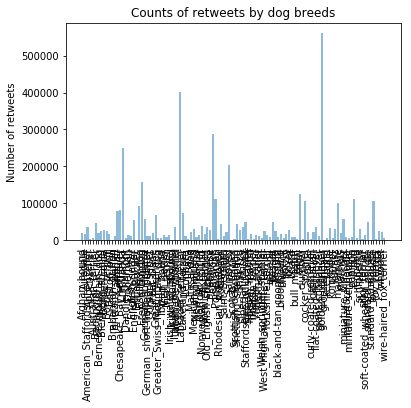

In [58]:
# plot the retweet count by breeds
%matplotlib inline

y_pos = df_retweet_count['retweet_count']
x_pos = df_retweet_count['dog_breed']
plt.bar(x_pos, y_pos, align='center', alpha=0.5)
plt.ylabel('Number of retweets')
plt.xticks(x_pos, rotation='vertical')
plt.title('Counts of retweets by dog breeds')
plt.show()

##### Due to the many dog breeds, I'm going to only look at those that have more than 200,000 retweet count

In [59]:
# subset only the count that are more than 200,000
df_retweet_count_sub = df_retweet_count.query('retweet_count >= 200000')

In [60]:
df_retweet_count_sub.head(10)

,dog_breed,retweet_count
15,Chihuahua,250887
36,Labrador_retriever,402881
48,Pembroke,287427
54,Samoyed,202426
88,golden_retriever,561895


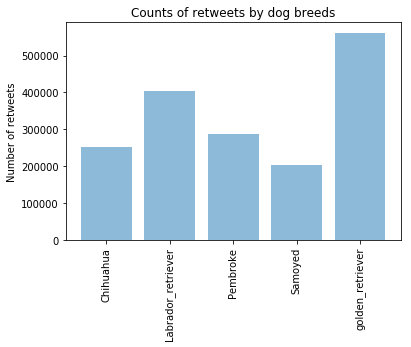

In [61]:
y_pos = df_retweet_count_sub['retweet_count']
x_pos = df_retweet_count_sub['dog_breed']
plt.bar(x_pos, y_pos, align='center', alpha=0.5)
plt.ylabel('Number of retweets')
plt.xticks(x_pos, rotation='vertical')
plt.title('Counts of retweets by dog breeds')
plt.show()

#### 2) Get Favorite count by dog breed:

In [62]:
# total up the favorite count per dog breed
fav_count = df.groupby('dog_breed')['favorite_count'].sum()

In [63]:
# converting the series to a dataframe
df_fav = fav_count.to_frame().reset_index()
df_fav = df_fav.rename(columns={0:'dog_breed'})
df_fav.name = 'favorite_count'

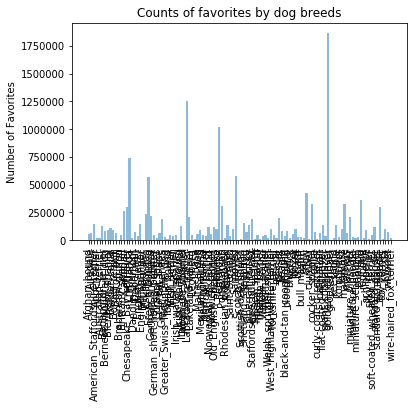

In [64]:
# plot the favorite count by breeds
y_pos = df_fav['favorite_count']
x_pos = df_fav['dog_breed']
plt.bar(x_pos, y_pos, align='center', alpha=0.5)
plt.ylabel('Number of Favorites')
plt.xticks(x_pos, rotation='vertical')
plt.title('Counts of favorites by dog breeds')
plt.show()

#####  Due to the many dog breeds, I'm going to only look at those that have more than 700,000 favorite count

In [65]:
# subsetting to those w/ more than 700,000
df_fav_sub = df_fav.query('favorite_count >= 700000')

In [66]:
df_fav_sub.head(10)

,dog_breed,favorite_count
15,Chihuahua,743280
36,Labrador_retriever,1250952
48,Pembroke,1018960
88,golden_retriever,1866261


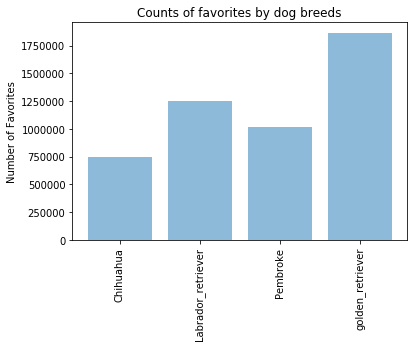

In [67]:
# plot the subset for those having at least 700,000 count
y_pos = df_fav_sub['favorite_count']
x_pos = df_fav_sub['dog_breed']
plt.bar(x_pos, y_pos, align='center', alpha=0.5)
plt.ylabel('Number of Favorites')
plt.xticks(x_pos, rotation='vertical')
plt.title('Counts of favorites by dog breeds')
plt.show()

In [68]:
# merge the favorite and retweet counts datasets
df_subset = df_retweet_count_sub.merge(df_fav_sub, on='dog_breed', how='inner')

In [69]:
df_subset.head(15)

,dog_breed,retweet_count,favorite_count
0,Chihuahua,250887,743280
1,Labrador_retriever,402881,1250952
2,Pembroke,287427,1018960
3,golden_retriever,561895,1866261


##### Plot a stacked bar plot for retweet count and favorite count by dog breeds:

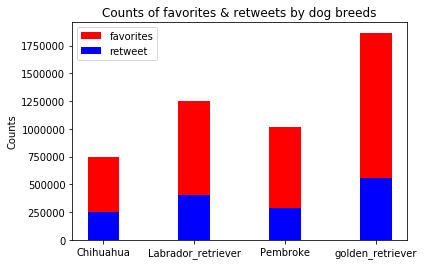

In [71]:
# data
cnt_retweet = df_subset['retweet_count']
cnt_fav = df_subset['favorite_count']
x_pos = df_subset['dog_breed']

# plot
width = 0.35

# create bars
plt.bar(x_pos, cnt_fav    , color='red', width=width, label='favorites')
plt.bar(x_pos, cnt_retweet, color='blue', width=width, label='retweet' )

plt.legend()

# custom axis
plt.title('Counts of favorites & retweets by dog breeds')
plt.ylabel('Counts')
plt.show()

# note for future reference: this works too
#    df_subset.plot(kind='bar', stacked=True, x='dog_breed');

##### 3)  Get Ratings by dog breeds:

In [72]:
# calculate average rating by dog breeds
avg_rating = df.groupby('dog_breed')['rating_numerator'].mean()

In [73]:
# converting the series to a dataframe
df_ratings = avg_rating.to_frame().reset_index()
df_ratings = df_ratings.rename(columns={0:'dog_breed'})
df_ratings.name = 'average_ratings'

In [74]:
df_ratings.sort_values('rating_numerator', ascending=False).head(10)

,dog_breed,rating_numerator
53,Saluki,12.500000
77,briard,12.333333
62,Tibetan_mastiff,12.250000
103,silky_terrier,12.000000
106,standard_schnauzer,12.000000
30,Irish_setter,11.750000
25,Gordon_setter,11.750000
54,Samoyed,11.731707
21,Eskimo_dog,11.600000
80,chow,11.522727


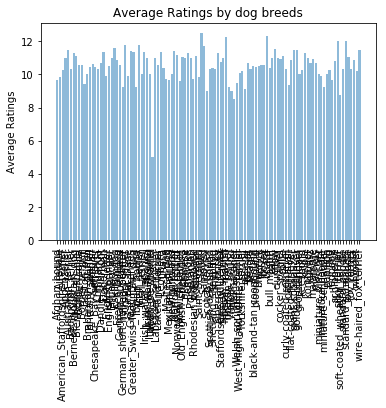

In [75]:
# plot the ratings by breeds
y_pos = df_ratings['rating_numerator']
x_pos = df_ratings['dog_breed']
plt.bar(x_pos, y_pos, align='center', alpha=0.5)
plt.ylabel('Average Ratings')
plt.xticks(x_pos, rotation='vertical')
plt.title('Average Ratings by dog breeds')
plt.show()

## References

- https://www.w3schools.com/python/python_json.asp
- http://pandas.pydata.org/pandas-docs/version/0.14.0/generated/pandas.set_option.html
- https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas
- https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe
- https://docs.python.org/3.4/howto/regex.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html
- https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas?noredirect=1&lq=1
- https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
- https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum/39923815
- https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe
- https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
